In [3]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import tensorflow as tf


In [4]:
#initialising the  CNN
classifier=Sequential()

In [5]:
#step 1 Convolution
classifier.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))#32 means 32 filters and 3,3 means a grid of 3*3 input shape = size of images

In [6]:
#step 2  Pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))


In [7]:
#adding a second convulation layer
classifier.add(Convolution2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [8]:
#step3 Flattening
classifier.add(Flatten())

In [9]:
#step 4 Full Connection
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))

In [10]:
#compiling the cnn
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
#fitting thr CNN to the images 
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen=ImageDataGenerator(rescale=1./255,# rescaling colors in 0 to 1 range
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [1]:
training_set=train_datagen.flow_from_directory('input/dataset/training_set',
                                               target_size=(64,64),
                                              batch_size=32,
                                              class_mode='binary')

NameError: name 'train_datagen' is not defined

In [14]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
test_set=test_datagen.flow_from_directory('input/dataset/test_set',
                                               target_size=(64,64),
                                              batch_size=32,
                                              class_mode='binary')

Found 2000 images belonging to 2 classes.


In [14]:
new_datagen=ImageDataGenerator(rescale=1./255)

In [15]:
new_set=new_datagen.flow_from_directory('C:\\Users\Mrigank Singh\Downloads\predict',
                                               target_size=(64,64),
                                              batch_size=32,
                                              class_mode='binary')

Found 15 images belonging to 1 classes.


In [ ]:
classifier.fit_generator(training_set,
                        steps_per_epoch=8000//32,# is equals to training files divided by batch size
                        epochs=10,
                        validation_data=test_set,
                        validation_steps=2000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
250/250 [==============================] - 163s 650ms/step - loss: 0.6811 - acc: 0.5711 - val_loss: 0.6397 - val_acc: 0.6404
Epoch 2/10
250/250 [==============================] - 149s 597ms/step - loss: 0.6284 - acc: 0.6517 - val_loss: 0.6073 - val_acc: 0.6808
Epoch 3/10
250/250 [==============================] - 148s 594ms/step - loss: 0.5871 - acc: 0.6967 - val_loss: 0.5781 - val_acc: 0.6886
Epoch 4/10
250/250 [==============================] - 149s 596ms/step - loss: 0.5509 - acc: 0.7181 - val_loss: 0.5274 - val_acc: 0.7385
Epoch 5/10
250/250 [==============================] - 151s 606ms/step - loss: 0.5234 - acc: 0.7404 - val_loss: 0.5220 - val_acc: 0.7436
Epoch 6/10
250/250 [==============================] - 150s 601ms/step - loss: 0.5155 - acc: 0.7455 - val_loss: 0.5381 - val_acc: 0.7332
Epoch 7/10
249/250 [============================>.] - ETA: 0s - loss: 0.4872 - acc: 0.7608

In [15]:
from ann_visualizer.visualize import ann_viz
ann_viz(classifier)

from PIL import Image,ImageFilter

dog=Image.open('input/dataset/training_set/dogs/dog.1.jpg')

dog.filter(ImageFilter.EMBOSS)

In [17]:
classifier.save('catsvdog')# saving the model

In [18]:
prediction=classifier.predict_generator(new_set,verbose=1,steps=15/32)

1/0 [================================================================] - 0s 297ms/step


In [19]:
import numpy as np
preddicted_class_indices=np.argmax(prediction,axis=1)

In [20]:
labels=(training_set.class_indices)
labels=dict((v,k)for k,v in labels.items())
prediction=[labels[k]for k in preddicted_class_indices]

In [21]:
prediction

['cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats']

In [ ]:
#softmax for multiple data

In [1]:
from keras.models import load_model
model=load_model('catsvdog')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [2]:
import tensorflow
import keras
import numpy as np
import os

In [3]:
def img_to_array(path,size=(64,64),sess= keras.backend.get_session()):
    
    img=tensorflow.read_file(path)
    img=tensorflow.image.decode_jpeg(img,channels=3)
    img.set_shape([None,None,3])
    img=tensorflow.image.resize_images(img,size)
    img=img.eval(session=sess)# convert to numpy array
    img=np.expand_dims(img,0)# make 'batch of 1'
    return img

In [16]:
base='input/dataset/test_set/dogs/'
files=os.listdir(base)
fullpath=[base+file for file in files]
base='input/dataset/test_set/cats/'
files=os.listdir(base)
fullpath+=[base+file for file in files]

In [ ]:
for image in fullpath:
    try:
        img=img_to_array(image)
        prediction=model.predict(img)[0][0]
        if  prediction==1:
            print(image, 'is dog')
        else:
            print(image,'is cat')
    except:
            pass

input/dataset/test_set/dogs/dog.4001.jpg is cat
input/dataset/test_set/dogs/dog.4002.jpg is dog
input/dataset/test_set/dogs/dog.4003.jpg is dog
input/dataset/test_set/dogs/dog.4004.jpg is dog
input/dataset/test_set/dogs/dog.4005.jpg is dog
input/dataset/test_set/dogs/dog.4006.jpg is cat
input/dataset/test_set/dogs/dog.4007.jpg is dog
input/dataset/test_set/dogs/dog.4008.jpg is dog
input/dataset/test_set/dogs/dog.4009.jpg is dog
input/dataset/test_set/dogs/dog.4010.jpg is dog
input/dataset/test_set/dogs/dog.4011.jpg is dog
input/dataset/test_set/dogs/dog.4012.jpg is dog
input/dataset/test_set/dogs/dog.4013.jpg is dog
input/dataset/test_set/dogs/dog.4014.jpg is dog
input/dataset/test_set/dogs/dog.4015.jpg is dog
input/dataset/test_set/dogs/dog.4016.jpg is dog
input/dataset/test_set/dogs/dog.4017.jpg is dog
input/dataset/test_set/dogs/dog.4018.jpg is dog
input/dataset/test_set/dogs/dog.4019.jpg is dog
input/dataset/test_set/dogs/dog.4020.jpg is dog
input/dataset/test_set/dogs/dog.4021.jpg

In [59]:
img=img_to_array('C:\\Users\Mrigank Singh\Downloads\predict\cats\cat2.jpg')
prediction=model.predict(img)
if  prediction==1:
    print( 'is dog')
else:
    print('is cat')

is cat


In [34]:
from PIL import Image,ImageFilter

In [62]:
dog=Image.open('C:\\Users\Mrigank Singh\Downloads\predict\cats\cat2.jpg')

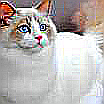

In [63]:
dog.filter(ImageFilter.EDGE_ENHANCE_MORE)

In [ ]:
8000/128